## Testing for other dataset

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

print(__doc__)

models_dir = '../models/'

# #############################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after
# cue onset.
tmin, tmax = -1.0, 4.0
subjects = [1,2,3,5,6,7,8,10,11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] 
runs = [6, 10]  # motor imagery: hands vs feet 
raws = []

for subject in subjects:
    raw_fnames = eegbci.load_data(subject, runs)
    # For each subject, load their raw data and append to the 'raws' list
    raws += [read_raw_edf(f, preload=True) for f in raw_fnames]

# Concatenate all Raw objects into a single Raw object
raw = concatenate_raws(raws)

Automatically created module for IPython interactive environment
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.i

Download complete in 08s (5.0 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S021\S021R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S021\S021R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


Download complete in 08s (5.0 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S022\S022R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S022\S022R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


Download complete in 07s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S023\S023R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S023\S023R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Download complete in 07s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S024\S024R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S024\S024R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Download complete in 08s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S025\S025R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S025\S025R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Download complete in 07s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S026\S026R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S026\S026R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Download complete in 07s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S027\S027R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S027\S027R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Download complete in 07s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S028\S028R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S028\S028R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


Download complete in 07s (4.9 MB)
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S029\S029R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
Extracting EDF parameters from C:\Users\Hannah\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S029\S029R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...


In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

print(__doc__)

# #############################################################################
# # Set parameters and read data

# raw_fnames = eegbci.load_data(subject, runs)
# raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("standard_1005")
raw.set_montage(montage)
#raw.annotations.rename(dict(T1="hands", T2="feet"))


# Apply band-pass filter
raw.filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier

events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3)) #changed these two lines
event_id = dict(hands=2, feet=3)

#tmin, tmax applied here already
epochs = Epochs(
    raw,
    events = events, 
    event_id= event_id,
    tmin=tmin,
    tmax=tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)
labels = epochs.events[:, -1] - 2

epochs_data = epochs.get_data(copy=False)
epochs_data_train = epochs_train.get_data(copy=False)

Automatically created module for IPython interactive environment
Filtering raw data in 54 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
810 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 810 events and 801 original time points ...
0 bad epochs dropped


## EEG Conformer


In [125]:
from braindecode.datasets import (
    create_from_mne_raw, create_from_mne_epochs)
from braindecode.preprocessing import create_windows_from_events
import mne
from mne.preprocessing import ICA
import sys

from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib_inline


sys.path.append('../models')

from eegconformer import EEGConformer



In [126]:
from sklearn.preprocessing import RobustScaler
import torch

# Assuming 'epochs_train' contains your epochs of interest

# Step 1: Extract EEG data from epochs
eeg_data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
print(eeg_data.shape)

# Step 2: Scale the EEG data
# Flatten the data for scaling, then scale, and reshape back
scaler = RobustScaler()
eeg_data_flattened = eeg_data.reshape(eeg_data.shape[0], -1)  # Flatten
eeg_data_scaled = scaler.fit_transform(eeg_data_flattened)
eeg_data_scaled = eeg_data_scaled.reshape(eeg_data.shape)  # Reshape back



C:\Users\Hannah\AppData\Local\Temp\ipykernel_13480\2033759025.py:7: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)


(810, 64, 801)


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming eeg_data_scaled is your scaled EEG data in NumPy array format
# and labels is a NumPy array of your labels

# Split the data and labels into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(
    eeg_data_scaled,  # Scaled EEG data
    labels,  # Labels
    test_size=0.2,  # Specifies 20% of the data for testing
    random_state=42  # Ensures reproducibility of your split
)
# Encode the training and testing labels
le = LabelEncoder()
encoded_train_y = le.fit_transform(train_y)
encoded_test_y = le.transform(test_y)

# One-hot encode the encoded labels
train_y = pd.get_dummies(encoded_train_y)
test_y = pd.get_dummies(encoded_test_y)

In [128]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((648, 64, 801), (162, 64, 801), (648, 2), (162, 2))

In [129]:
cuda = torch.cuda.is_available()
print(cuda)
device = "cuda" if cuda else "cpu"

False


In [130]:

cuda_version = torch.version.cuda
cuda_version

In [131]:
seed = 20240216

model = EEGConformer(
    n_outputs=2,
    n_chans=64,
    sfreq=160,
    n_times = epochs_data.shape[2],
    n_filters_time=40, 
    filter_time_length=25,
    pool_time_length=75,
    pool_time_stride=15,
    drop_prob=0.7,
    att_depth=3,
    att_heads=10,
    att_drop_prob=0.7,
    final_fc_length='auto', # could be 'auto' or int
    return_features=False, # returns the features before the last classification layer if True
    chs_info=None,
    input_window_seconds=None,
    add_log_softmax=True,
)

print(model)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGConformer (EEGConformer)                                  [1, 64, 801]              [1, 2]                    --                        --
├─_PatchEmbedding (patch_embedding): 1-1                     [1, 1, 64, 801]           [1, 47, 40]               --                        --
│    └─Sequential (shallownet): 2-1                          [1, 1, 64, 801]           [1, 40, 1, 47]            --                        --
│    │    └─Conv2d (0): 3-1                                  [1, 1, 64, 801]           [1, 40, 64, 777]          1,040                     [1, 25]
│    │    └─Conv2d (1): 3-2                                  [1, 40, 64, 777]          [1, 40, 1, 777]           102,440                   [64, 1]
│    │    └─BatchNorm2d (2): 3-3                             [1, 40, 1, 777]           [1, 40, 1, 777]           80             

c:\Users\Hannah\OneDrive\Documents\GitHub\eeg\notebooks\../models\base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


In [132]:
if cuda:
    model.cuda()

In [133]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import os



batch_size = 64

# Convert pandas dataframe (.values) to numpy, then find argmax if one-hot encoded
if len(train_y.shape) > 1:  # Check if train_y is one-hot encoded
    train_y_indices = np.argmax(train_y.values, axis=1)
else:
    train_y_indices = train_y.values  # Assuming it's already appropriate format

if len(test_y.shape) > 1:  # Check if test_y is one-hot encoded
    test_y_indices = np.argmax(test_y.values, axis=1)
else:
    test_y_indices = test_y.values  # Assuming it's already appropriate format

# Convert features and labels to tensors
x_train_tensor = torch.from_numpy(train_X).to(torch.float32).to(device)
y_train_tensor = torch.tensor(train_y_indices).to(torch.long).to(device)  # Use torch.long for class indices

x_test_tensor = torch.from_numpy(test_X).to(torch.float32).to(device)
y_test_tensor = torch.tensor(test_y_indices).to(torch.long).to(device)  # Use torch.long for class indices

# Create datasets and loaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.9, 0.999))


In [139]:
def train(model, x_train, y_train, x_test, y_test, save_path='../models/', n_epochs=100, patience=200):
    """
    the training function with early stopping.
    Attributes:
    - model: the instance of the network
    - save_path: the path to which the model state will be saved. None means w/o saving.
    - n_epochs: number of epochs to train the model for.
    - patience: number of epochs to wait without improvement before stopping.
    """
    train_acc_list = []
    train_loss_list = []
    test_acc_list = []
    test_loss_list = []

    best_accuracy = 0.0
    epochs_no_improve = 0  # Counter for epochs without improvement
    best_model_wts = None  # Initialize best model weights

    for epoch in range(n_epochs):
        # Training phase
        model.train()  # Set model to training mode
        training_loss = 0.0
        total = 0
        correct = 0
        
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()  # Zero the parameter gradients
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = training_loss / len(train_loader)
        train_accuracy = correct / total
        train_acc_list.append(train_accuracy)
        train_loss_list.append(train_loss)
        
        # Evaluation phase
        model.eval()  # Set model to evaluation mode
        testing_loss = 0.0
        total = 0
        correct = 0
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                testing_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
            test_loss = testing_loss / len(test_loader)
            test_accuracy = correct / total
            test_acc_list.append(test_accuracy)
            test_loss_list.append(test_loss)
        
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
        
        # Early Stopping Check
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model_wts = model.state_dict()  # Save the best model weights
            epochs_no_improve = 0  # Reset counter
        else:
            epochs_no_improve += 1  # Increment counter if no improvement
            if epochs_no_improve >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs.")
                break  # Exit the loop
    
    if save_path is not None and best_model_wts is not None:
        # Ensure the directory exists
        os.makedirs(save_path, exist_ok=True)
        # Save the best model
        torch.save(best_model_wts, os.path.join(save_path, 'cross_subject_conformer.pth'))
        print("Best model saved with accuracy: {:.4f}".format(best_accuracy))
        # Reload the best model weights
        model.load_state_dict(best_model_wts)
    
    return model, train_acc_list, train_loss_list, test_acc_list, test_loss_list


In [140]:
best_model, train_acc_list, train_loss_list, test_acc_list, test_loss_list = train(model, train_X, test_X, train_y, test_y, n_epochs=300)


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 1/300 - Train Loss: 0.2707, Train Accuracy: 0.8889, Test Loss: 1.9699, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 2/300 - Train Loss: 0.2331, Train Accuracy: 0.9028, Test Loss: 2.1041, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 3/300 - Train Loss: 0.2251, Train Accuracy: 0.9028, Test Loss: 2.6763, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.65it/s]


Epoch 4/300 - Train Loss: 0.2340, Train Accuracy: 0.9090, Test Loss: 2.7015, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 5/300 - Train Loss: 0.1943, Train Accuracy: 0.9198, Test Loss: 2.2745, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 6/300 - Train Loss: 0.2179, Train Accuracy: 0.9213, Test Loss: 2.2576, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 7/300 - Train Loss: 0.2422, Train Accuracy: 0.9290, Test Loss: 2.4155, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 8/300 - Train Loss: 0.2548, Train Accuracy: 0.9182, Test Loss: 2.4890, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 9/300 - Train Loss: 0.3165, Train Accuracy: 0.8765, Test Loss: 3.1428, Test Accuracy: 0.5802


100%|██████████| 11/11 [00:06<00:00,  1.64it/s]


Epoch 10/300 - Train Loss: 0.3739, Train Accuracy: 0.8410, Test Loss: 1.5928, Test Accuracy: 0.5741


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 11/300 - Train Loss: 0.3118, Train Accuracy: 0.8596, Test Loss: 1.4206, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.67it/s]


Epoch 12/300 - Train Loss: 0.2517, Train Accuracy: 0.8981, Test Loss: 2.1828, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 13/300 - Train Loss: 0.2120, Train Accuracy: 0.9059, Test Loss: 2.4574, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 14/300 - Train Loss: 0.1916, Train Accuracy: 0.9090, Test Loss: 2.4422, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 15/300 - Train Loss: 0.1999, Train Accuracy: 0.9213, Test Loss: 2.9460, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 16/300 - Train Loss: 0.1668, Train Accuracy: 0.9244, Test Loss: 3.3978, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 17/300 - Train Loss: 0.2268, Train Accuracy: 0.9213, Test Loss: 2.4911, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 18/300 - Train Loss: 0.2042, Train Accuracy: 0.9275, Test Loss: 2.3544, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 19/300 - Train Loss: 0.1687, Train Accuracy: 0.9336, Test Loss: 2.5141, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 20/300 - Train Loss: 0.2383, Train Accuracy: 0.9167, Test Loss: 3.1052, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 21/300 - Train Loss: 0.2785, Train Accuracy: 0.9090, Test Loss: 2.5656, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.63it/s]


Epoch 22/300 - Train Loss: 0.2047, Train Accuracy: 0.9136, Test Loss: 2.7480, Test Accuracy: 0.5802


100%|██████████| 11/11 [00:07<00:00,  1.55it/s]


Epoch 23/300 - Train Loss: 0.2507, Train Accuracy: 0.9028, Test Loss: 2.3968, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:07<00:00,  1.47it/s]


Epoch 24/300 - Train Loss: 0.2762, Train Accuracy: 0.8997, Test Loss: 2.3898, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 25/300 - Train Loss: 0.2176, Train Accuracy: 0.9228, Test Loss: 2.3056, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 26/300 - Train Loss: 0.3364, Train Accuracy: 0.8796, Test Loss: 2.1332, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 27/300 - Train Loss: 0.3032, Train Accuracy: 0.8750, Test Loss: 2.0536, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 28/300 - Train Loss: 0.2233, Train Accuracy: 0.9059, Test Loss: 2.1396, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 29/300 - Train Loss: 0.2270, Train Accuracy: 0.9074, Test Loss: 2.9817, Test Accuracy: 0.5864


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 30/300 - Train Loss: 0.2134, Train Accuracy: 0.8981, Test Loss: 2.4926, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 31/300 - Train Loss: 0.2016, Train Accuracy: 0.9198, Test Loss: 2.9103, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.67it/s]


Epoch 32/300 - Train Loss: 0.2293, Train Accuracy: 0.9321, Test Loss: 2.6319, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 33/300 - Train Loss: 0.2378, Train Accuracy: 0.9120, Test Loss: 2.1167, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 34/300 - Train Loss: 0.1948, Train Accuracy: 0.9136, Test Loss: 1.8754, Test Accuracy: 0.6852


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 35/300 - Train Loss: 0.1933, Train Accuracy: 0.9151, Test Loss: 2.0759, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 36/300 - Train Loss: 0.2217, Train Accuracy: 0.9228, Test Loss: 2.2934, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 37/300 - Train Loss: 0.2713, Train Accuracy: 0.9136, Test Loss: 3.3889, Test Accuracy: 0.5864


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 38/300 - Train Loss: 0.2890, Train Accuracy: 0.8719, Test Loss: 2.4609, Test Accuracy: 0.5802


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 39/300 - Train Loss: 0.2922, Train Accuracy: 0.9059, Test Loss: 1.7105, Test Accuracy: 0.6852


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 40/300 - Train Loss: 0.2728, Train Accuracy: 0.8935, Test Loss: 2.8327, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 41/300 - Train Loss: 0.3421, Train Accuracy: 0.8904, Test Loss: 2.0924, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 42/300 - Train Loss: 0.2293, Train Accuracy: 0.9012, Test Loss: 2.8950, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 43/300 - Train Loss: 0.2576, Train Accuracy: 0.9090, Test Loss: 3.1318, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 44/300 - Train Loss: 0.2238, Train Accuracy: 0.8920, Test Loss: 2.4788, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 45/300 - Train Loss: 0.2511, Train Accuracy: 0.9259, Test Loss: 2.4878, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 46/300 - Train Loss: 0.2898, Train Accuracy: 0.8873, Test Loss: 2.7148, Test Accuracy: 0.5741


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 47/300 - Train Loss: 0.2549, Train Accuracy: 0.8951, Test Loss: 1.8955, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 48/300 - Train Loss: 0.2577, Train Accuracy: 0.9012, Test Loss: 1.8482, Test Accuracy: 0.6790


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 49/300 - Train Loss: 0.2886, Train Accuracy: 0.8873, Test Loss: 2.0417, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 50/300 - Train Loss: 0.2282, Train Accuracy: 0.8889, Test Loss: 1.7867, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 51/300 - Train Loss: 0.1650, Train Accuracy: 0.9275, Test Loss: 2.4117, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 52/300 - Train Loss: 0.2255, Train Accuracy: 0.9290, Test Loss: 2.2471, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 53/300 - Train Loss: 0.2419, Train Accuracy: 0.8920, Test Loss: 2.1540, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 54/300 - Train Loss: 0.2244, Train Accuracy: 0.9074, Test Loss: 2.5346, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 55/300 - Train Loss: 0.2067, Train Accuracy: 0.9074, Test Loss: 2.7576, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 56/300 - Train Loss: 0.1614, Train Accuracy: 0.9259, Test Loss: 2.5272, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 57/300 - Train Loss: 0.2462, Train Accuracy: 0.9090, Test Loss: 2.4286, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.67it/s]


Epoch 58/300 - Train Loss: 0.1941, Train Accuracy: 0.9259, Test Loss: 2.3513, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 59/300 - Train Loss: 0.3734, Train Accuracy: 0.8997, Test Loss: 2.8992, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 60/300 - Train Loss: 0.2326, Train Accuracy: 0.9074, Test Loss: 1.7106, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 61/300 - Train Loss: 0.2231, Train Accuracy: 0.9043, Test Loss: 2.1839, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 62/300 - Train Loss: 0.3367, Train Accuracy: 0.9213, Test Loss: 2.1028, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 63/300 - Train Loss: 0.1899, Train Accuracy: 0.9228, Test Loss: 1.9195, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 64/300 - Train Loss: 0.2377, Train Accuracy: 0.9074, Test Loss: 2.1740, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 65/300 - Train Loss: 0.1706, Train Accuracy: 0.9244, Test Loss: 2.3719, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


Epoch 66/300 - Train Loss: 0.1535, Train Accuracy: 0.9275, Test Loss: 2.8784, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:07<00:00,  1.44it/s]


Epoch 67/300 - Train Loss: 0.1701, Train Accuracy: 0.9259, Test Loss: 3.0137, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.62it/s]


Epoch 68/300 - Train Loss: 0.1705, Train Accuracy: 0.9429, Test Loss: 2.5113, Test Accuracy: 0.6790


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 69/300 - Train Loss: 0.1853, Train Accuracy: 0.9398, Test Loss: 3.3334, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 70/300 - Train Loss: 0.2563, Train Accuracy: 0.9012, Test Loss: 2.3385, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 71/300 - Train Loss: 0.2227, Train Accuracy: 0.9306, Test Loss: 1.8848, Test Accuracy: 0.6790


100%|██████████| 11/11 [00:06<00:00,  1.64it/s]


Epoch 72/300 - Train Loss: 0.1759, Train Accuracy: 0.9275, Test Loss: 3.0550, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 73/300 - Train Loss: 0.1653, Train Accuracy: 0.9259, Test Loss: 2.9151, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 74/300 - Train Loss: 0.1844, Train Accuracy: 0.9336, Test Loss: 2.5724, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 75/300 - Train Loss: 0.1472, Train Accuracy: 0.9367, Test Loss: 3.1017, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 76/300 - Train Loss: 0.1610, Train Accuracy: 0.9336, Test Loss: 3.6736, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 77/300 - Train Loss: 0.1748, Train Accuracy: 0.9398, Test Loss: 3.2238, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 78/300 - Train Loss: 0.2723, Train Accuracy: 0.9167, Test Loss: 3.4913, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 79/300 - Train Loss: 0.3430, Train Accuracy: 0.8704, Test Loss: 2.5888, Test Accuracy: 0.5432


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 80/300 - Train Loss: 0.3126, Train Accuracy: 0.8519, Test Loss: 1.5710, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.62it/s]


Epoch 81/300 - Train Loss: 0.2485, Train Accuracy: 0.9028, Test Loss: 1.6067, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 82/300 - Train Loss: 0.1692, Train Accuracy: 0.9414, Test Loss: 2.1093, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 83/300 - Train Loss: 0.1255, Train Accuracy: 0.9552, Test Loss: 2.8130, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 84/300 - Train Loss: 0.1541, Train Accuracy: 0.9414, Test Loss: 2.8093, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 85/300 - Train Loss: 0.2107, Train Accuracy: 0.9522, Test Loss: 3.1502, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:11<00:00,  1.06s/it]


Epoch 86/300 - Train Loss: 0.2163, Train Accuracy: 0.9090, Test Loss: 2.8938, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:07<00:00,  1.40it/s]


Epoch 87/300 - Train Loss: 0.1573, Train Accuracy: 0.9275, Test Loss: 2.3625, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:07<00:00,  1.45it/s]


Epoch 88/300 - Train Loss: 0.2063, Train Accuracy: 0.9136, Test Loss: 2.1650, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:07<00:00,  1.45it/s]


Epoch 89/300 - Train Loss: 0.1963, Train Accuracy: 0.9306, Test Loss: 2.4429, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:07<00:00,  1.43it/s]


Epoch 90/300 - Train Loss: 0.2162, Train Accuracy: 0.9228, Test Loss: 2.6006, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.61it/s]


Epoch 91/300 - Train Loss: 0.1725, Train Accuracy: 0.9182, Test Loss: 2.3838, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:08<00:00,  1.28it/s]


Epoch 92/300 - Train Loss: 0.1790, Train Accuracy: 0.9244, Test Loss: 2.8659, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:07<00:00,  1.46it/s]


Epoch 93/300 - Train Loss: 0.1753, Train Accuracy: 0.9398, Test Loss: 3.1141, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.64it/s]


Epoch 94/300 - Train Loss: 0.1468, Train Accuracy: 0.9321, Test Loss: 2.9618, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.64it/s]


Epoch 95/300 - Train Loss: 0.1362, Train Accuracy: 0.9429, Test Loss: 2.7778, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.63it/s]


Epoch 96/300 - Train Loss: 0.1258, Train Accuracy: 0.9568, Test Loss: 2.8204, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:07<00:00,  1.53it/s]


Epoch 97/300 - Train Loss: 0.1293, Train Accuracy: 0.9537, Test Loss: 2.8806, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:07<00:00,  1.46it/s]


Epoch 98/300 - Train Loss: 0.1167, Train Accuracy: 0.9645, Test Loss: 3.0285, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:07<00:00,  1.50it/s]


Epoch 99/300 - Train Loss: 0.3020, Train Accuracy: 0.9306, Test Loss: 3.1378, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:07<00:00,  1.56it/s]


Epoch 100/300 - Train Loss: 0.2014, Train Accuracy: 0.9259, Test Loss: 2.1402, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:07<00:00,  1.47it/s]


Epoch 101/300 - Train Loss: 0.2182, Train Accuracy: 0.9059, Test Loss: 2.6694, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:07<00:00,  1.44it/s]


Epoch 102/300 - Train Loss: 0.1650, Train Accuracy: 0.9352, Test Loss: 2.4322, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:07<00:00,  1.51it/s]


Epoch 103/300 - Train Loss: 0.1562, Train Accuracy: 0.9429, Test Loss: 2.1487, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:07<00:00,  1.55it/s]


Epoch 104/300 - Train Loss: 0.2093, Train Accuracy: 0.9537, Test Loss: 2.4797, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.63it/s]


Epoch 105/300 - Train Loss: 0.1562, Train Accuracy: 0.9290, Test Loss: 2.7775, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.58it/s]


Epoch 106/300 - Train Loss: 0.1382, Train Accuracy: 0.9398, Test Loss: 2.5902, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:07<00:00,  1.57it/s]


Epoch 107/300 - Train Loss: 0.1179, Train Accuracy: 0.9552, Test Loss: 2.8632, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 108/300 - Train Loss: 0.1177, Train Accuracy: 0.9537, Test Loss: 3.1291, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.61it/s]


Epoch 109/300 - Train Loss: 0.1665, Train Accuracy: 0.9475, Test Loss: 4.2942, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.66it/s]


Epoch 110/300 - Train Loss: 0.1699, Train Accuracy: 0.9398, Test Loss: 2.8815, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 111/300 - Train Loss: 0.2041, Train Accuracy: 0.9244, Test Loss: 3.2572, Test Accuracy: 0.5741


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 112/300 - Train Loss: 0.2202, Train Accuracy: 0.9151, Test Loss: 2.4690, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 113/300 - Train Loss: 0.1728, Train Accuracy: 0.9383, Test Loss: 2.5987, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 114/300 - Train Loss: 0.1657, Train Accuracy: 0.9352, Test Loss: 2.3487, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 115/300 - Train Loss: 0.1536, Train Accuracy: 0.9491, Test Loss: 2.5705, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 116/300 - Train Loss: 0.1421, Train Accuracy: 0.9552, Test Loss: 2.7124, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 117/300 - Train Loss: 0.1245, Train Accuracy: 0.9491, Test Loss: 3.3489, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 118/300 - Train Loss: 0.2011, Train Accuracy: 0.9568, Test Loss: 3.3889, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 119/300 - Train Loss: 0.1567, Train Accuracy: 0.9398, Test Loss: 2.6270, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 120/300 - Train Loss: 0.2801, Train Accuracy: 0.9120, Test Loss: 2.7541, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 121/300 - Train Loss: 0.1741, Train Accuracy: 0.9259, Test Loss: 2.3512, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 122/300 - Train Loss: 0.1576, Train Accuracy: 0.9352, Test Loss: 2.6540, Test Accuracy: 0.5864


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 123/300 - Train Loss: 0.1317, Train Accuracy: 0.9506, Test Loss: 2.8420, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 124/300 - Train Loss: 0.2548, Train Accuracy: 0.9228, Test Loss: 2.9956, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 125/300 - Train Loss: 0.1627, Train Accuracy: 0.9475, Test Loss: 1.9358, Test Accuracy: 0.6914


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 126/300 - Train Loss: 0.1658, Train Accuracy: 0.9367, Test Loss: 2.7418, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 127/300 - Train Loss: 0.1687, Train Accuracy: 0.9290, Test Loss: 2.4076, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 128/300 - Train Loss: 0.1170, Train Accuracy: 0.9522, Test Loss: 2.3818, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 129/300 - Train Loss: 0.1003, Train Accuracy: 0.9537, Test Loss: 2.8328, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 130/300 - Train Loss: 0.1234, Train Accuracy: 0.9522, Test Loss: 2.9585, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 131/300 - Train Loss: 0.1411, Train Accuracy: 0.9429, Test Loss: 3.0399, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 132/300 - Train Loss: 0.1173, Train Accuracy: 0.9460, Test Loss: 3.2790, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 133/300 - Train Loss: 0.1301, Train Accuracy: 0.9522, Test Loss: 2.9159, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 134/300 - Train Loss: 0.1215, Train Accuracy: 0.9522, Test Loss: 3.5241, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 135/300 - Train Loss: 0.1609, Train Accuracy: 0.9336, Test Loss: 2.6214, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 136/300 - Train Loss: 0.1754, Train Accuracy: 0.9460, Test Loss: 3.1230, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 137/300 - Train Loss: 0.1392, Train Accuracy: 0.9444, Test Loss: 2.9048, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 138/300 - Train Loss: 0.1585, Train Accuracy: 0.9414, Test Loss: 2.6217, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 139/300 - Train Loss: 0.1458, Train Accuracy: 0.9414, Test Loss: 3.9723, Test Accuracy: 0.5802


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 140/300 - Train Loss: 0.2291, Train Accuracy: 0.9460, Test Loss: 3.1800, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 141/300 - Train Loss: 0.1740, Train Accuracy: 0.9537, Test Loss: 2.6172, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 142/300 - Train Loss: 0.2652, Train Accuracy: 0.9136, Test Loss: 3.1875, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 143/300 - Train Loss: 0.1784, Train Accuracy: 0.9321, Test Loss: 2.0735, Test Accuracy: 0.5864


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 144/300 - Train Loss: 0.1683, Train Accuracy: 0.9306, Test Loss: 2.3301, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 145/300 - Train Loss: 0.1422, Train Accuracy: 0.9522, Test Loss: 2.6049, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 146/300 - Train Loss: 0.1411, Train Accuracy: 0.9537, Test Loss: 2.8871, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 147/300 - Train Loss: 0.1553, Train Accuracy: 0.9583, Test Loss: 3.4088, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 148/300 - Train Loss: 0.2168, Train Accuracy: 0.9306, Test Loss: 2.7534, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 149/300 - Train Loss: 0.1632, Train Accuracy: 0.9336, Test Loss: 2.2757, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 150/300 - Train Loss: 0.1610, Train Accuracy: 0.9460, Test Loss: 2.1236, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 151/300 - Train Loss: 0.1705, Train Accuracy: 0.9506, Test Loss: 2.2244, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 152/300 - Train Loss: 0.2365, Train Accuracy: 0.9475, Test Loss: 2.5237, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 153/300 - Train Loss: 0.2280, Train Accuracy: 0.9306, Test Loss: 2.3241, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 154/300 - Train Loss: 0.1602, Train Accuracy: 0.9537, Test Loss: 1.9933, Test Accuracy: 0.6852


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 155/300 - Train Loss: 0.1416, Train Accuracy: 0.9552, Test Loss: 2.0808, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 156/300 - Train Loss: 0.1361, Train Accuracy: 0.9460, Test Loss: 2.2742, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 157/300 - Train Loss: 0.1003, Train Accuracy: 0.9660, Test Loss: 2.6860, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 158/300 - Train Loss: 0.1478, Train Accuracy: 0.9444, Test Loss: 3.2581, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 159/300 - Train Loss: 0.1251, Train Accuracy: 0.9475, Test Loss: 3.0129, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 160/300 - Train Loss: 0.1437, Train Accuracy: 0.9321, Test Loss: 3.0354, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 161/300 - Train Loss: 0.1236, Train Accuracy: 0.9444, Test Loss: 2.9634, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 162/300 - Train Loss: 0.1870, Train Accuracy: 0.9336, Test Loss: 2.6884, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 163/300 - Train Loss: 0.1575, Train Accuracy: 0.9568, Test Loss: 3.6004, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 164/300 - Train Loss: 0.2434, Train Accuracy: 0.9367, Test Loss: 2.6925, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 165/300 - Train Loss: 0.2150, Train Accuracy: 0.9244, Test Loss: 2.1890, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 166/300 - Train Loss: 0.2291, Train Accuracy: 0.8966, Test Loss: 2.2193, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 167/300 - Train Loss: 0.2027, Train Accuracy: 0.9213, Test Loss: 1.9076, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 168/300 - Train Loss: 0.1384, Train Accuracy: 0.9460, Test Loss: 2.2695, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 169/300 - Train Loss: 0.1435, Train Accuracy: 0.9475, Test Loss: 2.1777, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 170/300 - Train Loss: 0.1769, Train Accuracy: 0.9306, Test Loss: 2.9202, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 171/300 - Train Loss: 0.1192, Train Accuracy: 0.9583, Test Loss: 2.8286, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 172/300 - Train Loss: 0.1226, Train Accuracy: 0.9522, Test Loss: 3.1688, Test Accuracy: 0.5864


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 173/300 - Train Loss: 0.1121, Train Accuracy: 0.9630, Test Loss: 2.7803, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 174/300 - Train Loss: 0.0977, Train Accuracy: 0.9583, Test Loss: 2.6289, Test Accuracy: 0.6790


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 175/300 - Train Loss: 0.1478, Train Accuracy: 0.9522, Test Loss: 3.0942, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 176/300 - Train Loss: 0.2046, Train Accuracy: 0.9398, Test Loss: 2.7463, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 177/300 - Train Loss: 0.2262, Train Accuracy: 0.9213, Test Loss: 2.5804, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 178/300 - Train Loss: 0.2580, Train Accuracy: 0.9306, Test Loss: 3.1158, Test Accuracy: 0.5802


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 179/300 - Train Loss: 0.2396, Train Accuracy: 0.8997, Test Loss: 1.6988, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 180/300 - Train Loss: 0.1923, Train Accuracy: 0.9120, Test Loss: 1.9597, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 181/300 - Train Loss: 0.1787, Train Accuracy: 0.9290, Test Loss: 2.5495, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 182/300 - Train Loss: 0.1287, Train Accuracy: 0.9429, Test Loss: 2.2423, Test Accuracy: 0.6790


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 183/300 - Train Loss: 0.1467, Train Accuracy: 0.9444, Test Loss: 2.7633, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 184/300 - Train Loss: 0.1226, Train Accuracy: 0.9321, Test Loss: 3.1148, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 185/300 - Train Loss: 0.1418, Train Accuracy: 0.9383, Test Loss: 3.8193, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 186/300 - Train Loss: 0.2605, Train Accuracy: 0.9336, Test Loss: 3.8366, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 187/300 - Train Loss: 0.2264, Train Accuracy: 0.9136, Test Loss: 2.4224, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 188/300 - Train Loss: 0.2352, Train Accuracy: 0.9043, Test Loss: 1.7861, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 189/300 - Train Loss: 0.2171, Train Accuracy: 0.9259, Test Loss: 2.0700, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 190/300 - Train Loss: 0.1396, Train Accuracy: 0.9414, Test Loss: 2.7922, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 191/300 - Train Loss: 0.1481, Train Accuracy: 0.9414, Test Loss: 3.0941, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 192/300 - Train Loss: 0.1307, Train Accuracy: 0.9444, Test Loss: 3.0340, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 193/300 - Train Loss: 0.1700, Train Accuracy: 0.9414, Test Loss: 3.3680, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 194/300 - Train Loss: 0.1509, Train Accuracy: 0.9552, Test Loss: 2.9678, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 195/300 - Train Loss: 0.1768, Train Accuracy: 0.9244, Test Loss: 2.8101, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 196/300 - Train Loss: 0.2044, Train Accuracy: 0.9352, Test Loss: 2.6789, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 197/300 - Train Loss: 0.1974, Train Accuracy: 0.9244, Test Loss: 2.2944, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 198/300 - Train Loss: 0.1646, Train Accuracy: 0.9383, Test Loss: 2.6168, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 199/300 - Train Loss: 0.1770, Train Accuracy: 0.9460, Test Loss: 3.6957, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 200/300 - Train Loss: 0.1211, Train Accuracy: 0.9583, Test Loss: 2.5016, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 201/300 - Train Loss: 0.1192, Train Accuracy: 0.9552, Test Loss: 2.5601, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 202/300 - Train Loss: 0.0870, Train Accuracy: 0.9722, Test Loss: 2.8713, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 203/300 - Train Loss: 0.1467, Train Accuracy: 0.9398, Test Loss: 3.5109, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 204/300 - Train Loss: 0.1441, Train Accuracy: 0.9475, Test Loss: 2.9615, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 205/300 - Train Loss: 0.1249, Train Accuracy: 0.9614, Test Loss: 2.9036, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 206/300 - Train Loss: 0.1024, Train Accuracy: 0.9599, Test Loss: 2.8486, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 207/300 - Train Loss: 0.1371, Train Accuracy: 0.9506, Test Loss: 2.9859, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 208/300 - Train Loss: 0.1771, Train Accuracy: 0.9259, Test Loss: 2.8426, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 209/300 - Train Loss: 0.2761, Train Accuracy: 0.9259, Test Loss: 2.5881, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 210/300 - Train Loss: 0.1488, Train Accuracy: 0.9552, Test Loss: 3.2512, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 211/300 - Train Loss: 0.1644, Train Accuracy: 0.9460, Test Loss: 3.3063, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 212/300 - Train Loss: 0.1747, Train Accuracy: 0.9228, Test Loss: 2.3934, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 213/300 - Train Loss: 0.1382, Train Accuracy: 0.9352, Test Loss: 2.5100, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 214/300 - Train Loss: 0.1781, Train Accuracy: 0.9367, Test Loss: 2.7778, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 215/300 - Train Loss: 0.1471, Train Accuracy: 0.9460, Test Loss: 2.6264, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 216/300 - Train Loss: 0.1184, Train Accuracy: 0.9552, Test Loss: 2.9111, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 217/300 - Train Loss: 0.1060, Train Accuracy: 0.9630, Test Loss: 2.7764, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 218/300 - Train Loss: 0.1097, Train Accuracy: 0.9537, Test Loss: 3.6005, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 219/300 - Train Loss: 0.2072, Train Accuracy: 0.9522, Test Loss: 3.0433, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 220/300 - Train Loss: 0.2378, Train Accuracy: 0.9120, Test Loss: 3.8113, Test Accuracy: 0.5926


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 221/300 - Train Loss: 0.2504, Train Accuracy: 0.8843, Test Loss: 1.7557, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 222/300 - Train Loss: 0.1942, Train Accuracy: 0.9290, Test Loss: 2.0583, Test Accuracy: 0.5988


100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Epoch 223/300 - Train Loss: 0.1578, Train Accuracy: 0.9552, Test Loss: 2.4208, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 224/300 - Train Loss: 0.1871, Train Accuracy: 0.9336, Test Loss: 3.3318, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 225/300 - Train Loss: 0.1119, Train Accuracy: 0.9522, Test Loss: 2.7808, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 226/300 - Train Loss: 0.2900, Train Accuracy: 0.9383, Test Loss: 3.1801, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 227/300 - Train Loss: 0.1767, Train Accuracy: 0.9321, Test Loss: 2.0479, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 228/300 - Train Loss: 0.1466, Train Accuracy: 0.9398, Test Loss: 2.0011, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 229/300 - Train Loss: 0.1437, Train Accuracy: 0.9568, Test Loss: 2.5951, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 230/300 - Train Loss: 0.1070, Train Accuracy: 0.9599, Test Loss: 2.8441, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 231/300 - Train Loss: 0.1973, Train Accuracy: 0.9398, Test Loss: 2.8298, Test Accuracy: 0.6852


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 232/300 - Train Loss: 0.1108, Train Accuracy: 0.9676, Test Loss: 2.2467, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 233/300 - Train Loss: 0.0938, Train Accuracy: 0.9537, Test Loss: 2.5953, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 234/300 - Train Loss: 0.0859, Train Accuracy: 0.9676, Test Loss: 3.1240, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 235/300 - Train Loss: 0.1330, Train Accuracy: 0.9491, Test Loss: 3.0683, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 236/300 - Train Loss: 0.2265, Train Accuracy: 0.9583, Test Loss: 3.1149, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 237/300 - Train Loss: 0.3805, Train Accuracy: 0.8627, Test Loss: 3.1976, Test Accuracy: 0.5062


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 238/300 - Train Loss: 0.2650, Train Accuracy: 0.8858, Test Loss: 2.1405, Test Accuracy: 0.5864


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 239/300 - Train Loss: 0.2115, Train Accuracy: 0.9167, Test Loss: 1.5608, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 240/300 - Train Loss: 0.1834, Train Accuracy: 0.9414, Test Loss: 2.1561, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 241/300 - Train Loss: 0.1777, Train Accuracy: 0.9352, Test Loss: 2.5362, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 242/300 - Train Loss: 0.1411, Train Accuracy: 0.9414, Test Loss: 2.7424, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 243/300 - Train Loss: 0.1476, Train Accuracy: 0.9552, Test Loss: 2.4376, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 244/300 - Train Loss: 0.2029, Train Accuracy: 0.9136, Test Loss: 2.2915, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 245/300 - Train Loss: 0.1392, Train Accuracy: 0.9599, Test Loss: 2.9866, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 246/300 - Train Loss: 0.1317, Train Accuracy: 0.9460, Test Loss: 2.4990, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 247/300 - Train Loss: 0.0905, Train Accuracy: 0.9645, Test Loss: 2.5074, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 248/300 - Train Loss: 0.1446, Train Accuracy: 0.9552, Test Loss: 2.6611, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 249/300 - Train Loss: 0.1062, Train Accuracy: 0.9522, Test Loss: 4.0068, Test Accuracy: 0.6049


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 250/300 - Train Loss: 0.1026, Train Accuracy: 0.9630, Test Loss: 2.9628, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 251/300 - Train Loss: 0.3132, Train Accuracy: 0.9753, Test Loss: 2.9311, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 252/300 - Train Loss: 0.3136, Train Accuracy: 0.9136, Test Loss: 2.6455, Test Accuracy: 0.5802


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 253/300 - Train Loss: 0.1658, Train Accuracy: 0.9383, Test Loss: 1.8668, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 254/300 - Train Loss: 0.1624, Train Accuracy: 0.9506, Test Loss: 1.8518, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 255/300 - Train Loss: 0.1134, Train Accuracy: 0.9599, Test Loss: 2.3696, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 256/300 - Train Loss: 0.0890, Train Accuracy: 0.9660, Test Loss: 2.8472, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 257/300 - Train Loss: 0.1152, Train Accuracy: 0.9537, Test Loss: 3.0837, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 258/300 - Train Loss: 0.0847, Train Accuracy: 0.9645, Test Loss: 2.9474, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 259/300 - Train Loss: 0.0733, Train Accuracy: 0.9815, Test Loss: 3.0411, Test Accuracy: 0.6852


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 260/300 - Train Loss: 0.0948, Train Accuracy: 0.9630, Test Loss: 2.8718, Test Accuracy: 0.6667


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 261/300 - Train Loss: 0.1075, Train Accuracy: 0.9691, Test Loss: 2.9076, Test Accuracy: 0.6852


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 262/300 - Train Loss: 0.1115, Train Accuracy: 0.9568, Test Loss: 3.1519, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 263/300 - Train Loss: 0.1133, Train Accuracy: 0.9583, Test Loss: 3.0577, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 264/300 - Train Loss: 0.1306, Train Accuracy: 0.9444, Test Loss: 2.6956, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 265/300 - Train Loss: 0.1814, Train Accuracy: 0.9398, Test Loss: 2.7196, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


Epoch 266/300 - Train Loss: 0.2021, Train Accuracy: 0.9552, Test Loss: 2.8290, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


Epoch 267/300 - Train Loss: 0.1404, Train Accuracy: 0.9537, Test Loss: 2.3937, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 268/300 - Train Loss: 0.1345, Train Accuracy: 0.9460, Test Loss: 2.0197, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 269/300 - Train Loss: 0.1322, Train Accuracy: 0.9537, Test Loss: 2.5062, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 270/300 - Train Loss: 0.0752, Train Accuracy: 0.9691, Test Loss: 2.7707, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


Epoch 271/300 - Train Loss: 0.1335, Train Accuracy: 0.9568, Test Loss: 2.9080, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 272/300 - Train Loss: 0.1050, Train Accuracy: 0.9614, Test Loss: 2.8164, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 273/300 - Train Loss: 0.0849, Train Accuracy: 0.9568, Test Loss: 2.8488, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 274/300 - Train Loss: 0.0886, Train Accuracy: 0.9738, Test Loss: 2.6720, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 275/300 - Train Loss: 0.0762, Train Accuracy: 0.9722, Test Loss: 2.7260, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 276/300 - Train Loss: 0.0633, Train Accuracy: 0.9722, Test Loss: 3.0029, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.71it/s]


Epoch 277/300 - Train Loss: 0.0985, Train Accuracy: 0.9691, Test Loss: 3.6590, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 278/300 - Train Loss: 0.0882, Train Accuracy: 0.9614, Test Loss: 3.6101, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 279/300 - Train Loss: 0.1348, Train Accuracy: 0.9383, Test Loss: 3.0932, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 280/300 - Train Loss: 0.0671, Train Accuracy: 0.9722, Test Loss: 2.8268, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 281/300 - Train Loss: 0.1640, Train Accuracy: 0.9537, Test Loss: 3.1375, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]


Epoch 282/300 - Train Loss: 0.1354, Train Accuracy: 0.9506, Test Loss: 3.3249, Test Accuracy: 0.6111


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 283/300 - Train Loss: 0.1045, Train Accuracy: 0.9660, Test Loss: 3.1343, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 284/300 - Train Loss: 0.1018, Train Accuracy: 0.9568, Test Loss: 2.6867, Test Accuracy: 0.6173


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 285/300 - Train Loss: 0.1288, Train Accuracy: 0.9660, Test Loss: 3.1887, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 286/300 - Train Loss: 0.1271, Train Accuracy: 0.9630, Test Loss: 2.7884, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


Epoch 287/300 - Train Loss: 0.1971, Train Accuracy: 0.9383, Test Loss: 2.5276, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 288/300 - Train Loss: 0.1210, Train Accuracy: 0.9537, Test Loss: 2.4517, Test Accuracy: 0.6296


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 289/300 - Train Loss: 0.1125, Train Accuracy: 0.9568, Test Loss: 2.8294, Test Accuracy: 0.6358


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 290/300 - Train Loss: 0.1231, Train Accuracy: 0.9676, Test Loss: 2.6449, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 291/300 - Train Loss: 0.0792, Train Accuracy: 0.9784, Test Loss: 2.6376, Test Accuracy: 0.6420


100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


Epoch 292/300 - Train Loss: 0.0592, Train Accuracy: 0.9769, Test Loss: 2.7766, Test Accuracy: 0.6543


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 293/300 - Train Loss: 0.1181, Train Accuracy: 0.9614, Test Loss: 2.9300, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


Epoch 294/300 - Train Loss: 0.0893, Train Accuracy: 0.9691, Test Loss: 3.0613, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


Epoch 295/300 - Train Loss: 0.0546, Train Accuracy: 0.9830, Test Loss: 3.3583, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:07<00:00,  1.51it/s]


Epoch 296/300 - Train Loss: 0.0623, Train Accuracy: 0.9707, Test Loss: 3.5528, Test Accuracy: 0.6728


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 297/300 - Train Loss: 0.0984, Train Accuracy: 0.9676, Test Loss: 4.0958, Test Accuracy: 0.6605


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 298/300 - Train Loss: 0.1092, Train Accuracy: 0.9537, Test Loss: 3.1750, Test Accuracy: 0.6481


100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


Epoch 299/300 - Train Loss: 0.0713, Train Accuracy: 0.9722, Test Loss: 3.2010, Test Accuracy: 0.6235


100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


Epoch 300/300 - Train Loss: 0.0787, Train Accuracy: 0.9769, Test Loss: 3.7558, Test Accuracy: 0.6111
Best model saved with accuracy: 0.6914


Text(0.5, 0, 'epoch')

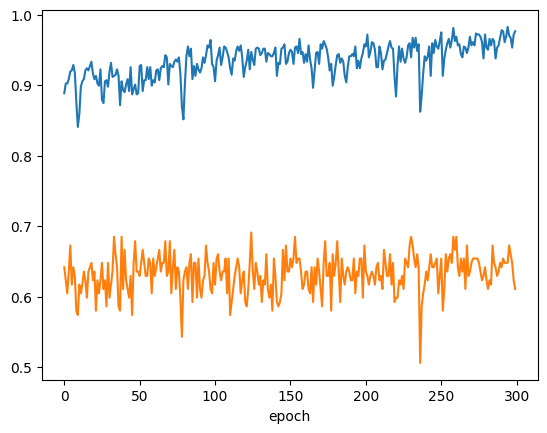

In [141]:
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

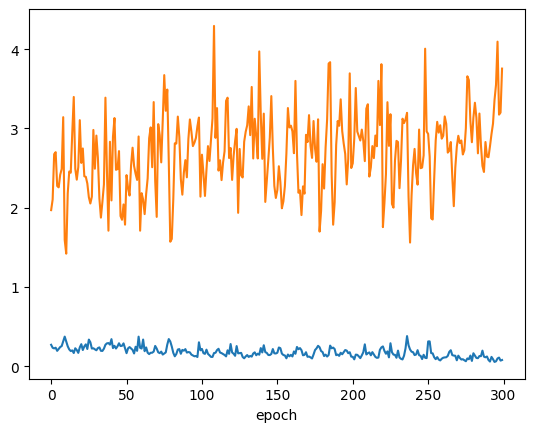

In [142]:
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.xlabel('epoch')

In [143]:
best_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        # Remove the incorrect line attempting to use torch.max on labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Compare predicted directly to labels
    
    test_accuracy = correct / total

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.6111
